<a href="https://colab.research.google.com/github/ManojKumarKolli/ManojKumar_INFO5731_Spring2024/blob/main/Assignments/Kolli_Manoj_Kumar_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
imdb_data = pd.read_csv('/content/drive/MyDrive/5731/imdb_reviews_sentiment.csv')

# Question 1: Features used for topic modeling
# Using CountVectorizer for text representation
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=1000)
doc_term_matrix = count_vectorizer.fit_transform(imdb_data['clean_text'])

# Perform LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model.fit(doc_term_matrix)

# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    topic_descriptions = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_words = ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_descriptions[f"Topic {topic_idx + 1}"] = topic_words
    return topic_descriptions

In [ ]:
# Answer to Question 2: Top 10 clusters
top_words_per_topic = display_topics(lda_model, count_vectorizer.get_feature_names_out(), 10)
print("\nQuestion 2: Top 10 clusters for topic modeling:")
for topic, words in top_words_per_topic.items():
    print(f"{topic}: {words}")


Question 2: Top 10 clusters for topic modeling:
Topic 1: film, movi, charact, endgam, marvel, mcu, like, aveng, year, infin
Topic 2: movi, watch, marvel, love, fan, realli, time, good, hour, end
Topic 3: aveng, film, endgam, charact, marvel, thano, infin, univers, captain, man
Topic 4: infin, end, war, time, charact, movi, act, like, film, slow
Topic 5: movi, watch, emot, dont, like, good, end, cri, great, action
Topic 6: movi, infin, war, like, time, end, good, charact, plot, way
Topic 7: plot, hole, aveng, movi, endgam, futur, rate, time, entertain, past
Topic 8: end, movi, charact, time, thor, perfect, hulk, iron, mani, like
Topic 9: movi, best, epic, year, endgam, superhero, aveng, conclus, like, end
Topic 10: movi, watch, marvel, film, end, best, time, war, infin, mcu


# Answer to Question 3: Describe each cluster

Topic 1:

Key Words: film, movie, character, Endgame, Marvel, MCU, like, Avengers, year, Infinity
Description: This topic likely covers reviews that focus on character development and overarching plot elements within Marvel movies, particularly "Endgame" and "Infinity War," discussing aspects like film quality and impact over the years.

Topic 2:

Key Words: movie, watch, Marvel, love, fan, really, time, good, hour, end
Description: Enthusiastic and emotional reactions from fans who deeply enjoy Marvel films, emphasizing the enjoyment and engagement throughout the movies' runtime.

Topic 3:

Key Words: Avengers, film, Endgame, character, Marvel, Thanos, Infinity, universe, Captain, man
Description: Discussions centered around "Avengers: Endgame" and key characters such as Thanos and Captain America, focusing on their roles within the expansive Marvel Universe.

Topic 4:

Key Words: Infinity, end, war, time, character, movie, act, like, film, slow
Description: Critical reviews possibly addressing the pacing ("slow") and the narrative structure of "Infinity War," discussing how the movie handles its climax and key character arcs.

Topic 5:

Key Words: movie, watch, emotional, don’t, like, good, end, cry, great, action
Description: Emotional and impactful reviews highlighting movies that evoke strong feelings, from tears to excitement, likely focusing on dramatic and action-packed scenes.

Topic 6:

Key Words: movie, Infinity, war, like, time, end, good, character, plot, way
Description: Analyzes the storytelling and plot elements of "Infinity War," focusing on how well the plot was executed and its impact on the characters' development.

Topic 7:

Key Words: plot, hole, Avengers, movie, Endgame, future, rate, time, entertaining, past
Description: Reviews that critique the logical consistency and plot integrity of "Endgame," discussing how it handles themes of time and how entertaining it remains despite plot holes.

Topic 8:

Key Words: end, movie, character, time, Thor, perfect, Hulk, iron, many, like
Description: Discusses the resolution and development of specific characters such as Thor and Hulk, focusing on their journeys and the satisfactory conclusion of their arcs.

Topic 9:

Key Words: movie, best, epic, year, Endgame, superhero, Avengers, conclusion, like, end
Description: High praise for "Endgame" as a monumental and epic conclusion to the Avengers saga, often cited as one of the best superhero movies of the year.

Topic 10:

Key Words: movie, watch, Marvel, film, end, best, time, war, Infinity, MCU
Description: General reviews that appreciate the cinematic craftsmanship and storytelling of Marvel movies, particularly highlighting their role within the broader Marvel Cinematic Universe.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.


### Feature Selection for Sentiment Classification

For sentiment classification, **TF-IDF (Term Frequency-Inverse Document Frequency)** is chosen because it effectively captures the importance of words in documents. Here’s why it's suitable:

- **Term Frequency (TF)** highlights words that are frequent in a specific document, which can indicate sentiment.
- **Inverse Document Frequency (IDF)** diminishes the weight of words that appear too frequently across all documents, helping to filter out common but uninformative words.

**TF-IDF** combines these two metrics, ensuring that words which are critical for understanding the sentiment of a document are given higher importance. This approach helps in emphasizing words that are pivotal in expressing sentiments, making it an ideal choice for sentiment analysis.

In [ ]:
# Write your code here

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline

# Load the dataset
# data = pd.read_csv('/path/to/imdb_reviews_sentiment.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(imdb_data['clean_text'], imdb_data['sentiment'], test_size=0.2, random_state=42)

# Question 1: Select features for sentiment classification
# Define a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Question 2: Build two sentiment classifiers
# We'll use Logistic Regression and Multinomial Naive Bayes for this task.

# Create pipelines for both classifiers
logistic_pipeline = make_pipeline(tfidf_vectorizer, LogisticRegression(random_state=0))
nb_pipeline = make_pipeline(tfidf_vectorizer, MultinomialNB())

# Perform cross-validation
logistic_cv_scores = cross_val_score(logistic_pipeline, X_train, y_train, cv=5)
nb_cv_scores = cross_val_score(nb_pipeline, X_train, y_train, cv=5)

# Train the models on the training data
logistic_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)

# Question 3: Compare the performance
# Use the trained models to make predictions on the test set
logistic_predictions = logistic_pipeline.predict(X_test)
nb_predictions = nb_pipeline.predict(X_test)

# Calculate metrics for Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, average='macro')
logistic_recall = recall_score(y_test, logistic_predictions, average='macro')
logistic_f1 = f1_score(y_test, logistic_predictions, average='macro')

# Calculate metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='macro')
nb_recall = recall_score(y_test, nb_predictions, average='macro')
nb_f1 = f1_score(y_test, nb_predictions, average='macro')

# Print results
print(f"Logistic Regression - Accuracy: {logistic_accuracy}, Precision: {logistic_precision}, Recall: {logistic_recall}, F1: {logistic_f1}")
print(f"Naive Bayes - Accuracy: {nb_accuracy}, Precision: {nb_precision}, Recall: {nb_recall}, F1: {nb_f1}")




Logistic Regression - Accuracy: 0.895, Precision: 0.6307692307692307, Recall: 0.4090909090909091, F1: 0.43781993375489314
Naive Bayes - Accuracy: 0.87, Precision: 0.29, Recall: 0.3333333333333333, F1: 0.3101604278074866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.



Missing Values in dataset:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


Dataset INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non

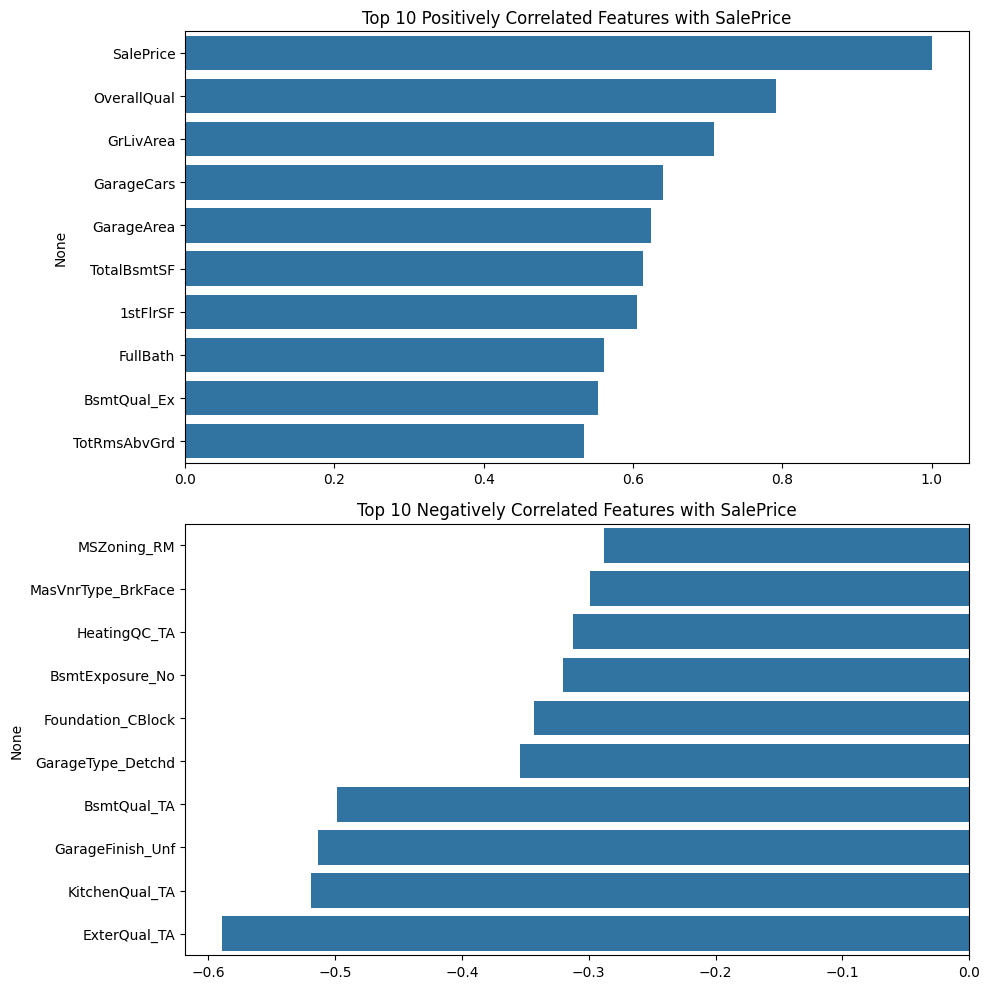

Selected Features Based on Correlation: ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex', 'GarageFinish_Unf', 'KitchenQual_TA', 'ExterQual_TA']
R-squared: 0.8281879535831652


In [ ]:
# Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_df = pd.read_csv("/content/drive/MyDrive/5731/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/5731/test.csv")


# 1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
print("\n\nMissing Values in dataset:")
print(train_df.isnull().sum())
print(test_df.isnull().sum())

print("\n\nDataset INFO:")
print(train_df.info())
print(test_df.info())


# Removing rows where the target variable (SalePrice) is missing in the training data
train_df = train_df.dropna(subset=['SalePrice'])

# Filling missing values
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = train_df[column].fillna(train_df[column].mode()[0])
    else:
        train_df[column] = train_df[column].fillna(train_df[column].median())

# Applying the same transformations to the test dataset
for column in test_df.columns:
    if test_df[column].dtype == 'object':
        test_df[column] = test_df[column].fillna(train_df[column].mode()[0])
    else:
        test_df[column] = test_df[column].fillna(train_df[column].median())

# Encoding categorical variables
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)


# Splitting train_df into train and validation sets
X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute the correlation matrix
correlation_matrix = train_df.corr()

# Selecting the correlation of features with the target variable 'SalePrice'
target_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Plotting top and bottom 10 features correlated with SalePrice
plt.figure(figsize=(10, 10))

# Top 10 positively correlated features
top_corr_features = target_correlation.head(10)  # Top 10 features
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.barplot(x=top_corr_features.values, y=top_corr_features.index)
plt.title('Top 10 Positively Correlated Features with SalePrice')

# Top 10 negatively correlated features
bottom_corr_features = target_correlation.tail(10)  # Bottom 10 features (most negative)
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.barplot(x=bottom_corr_features.values, y=bottom_corr_features.index)
plt.title('Top 10 Negatively Correlated Features with SalePrice')

plt.tight_layout()
plt.show()

# Selecting features based on high absolute correlation
selected_features = target_correlation[abs(target_correlation) > 0.5].index.tolist()
print("Selected Features Based on Correlation:", selected_features)

selected_features.remove("SalePrice")
# Reduce training and validation data to selected features
X_train = X_train[selected_features]
X_val = X_val[selected_features]


# Initialize and train the model using selected features
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate model performance
r2 = r2_score(y_val, y_pred)
print("R-squared:", r2)





# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.




RoBERTa (Robustly Optimized BERT Approach) is an advanced variant of BERT optimized for more robust performance. It was trained on over 160GB of text from various sources like books, websites, and CommonCrawl data, making it versatile for different NLP tasks.



*   Pretraining Data: Extensive corpus from CommonCrawl News, WebText, and Wikipedia.
*   Number of Parameters: Approximately 125 million in the roberta-base model.
*   Fine-Tuning: No task-specific fine-tuning in this zero-shot classification setup.

In [ ]:
# Write your code here


import pandas as pd
from transformers import pipeline

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/5731/imdb_reviews_sentiment.csv')
print(data.head())

# Initialize the zero-shot classification pipeline with RoBERTa
classifier = pipeline("zero-shot-classification", model="roberta-base")

# Define sentiment classes
classes = ['positive', 'negative', 'neutral']

# Apply the classifier to each review
results = data['clean_text'].apply(lambda x: classifier(x, candidate_labels=classes, hypothesis_template="This text is {}."))

# Extract predicted sentiment and corresponding scores
data['predicted_sentiment'] = [result['labels'][0] for result in results]
data['sentiment_score'] = [result['scores'][0] for result in results]



   document_id                                         clean_text sentiment
0            1  infin war amaz nope hollyweird doesnt know fin...  negative
1            2           cant get better best mcu marvel movi imo  negative
2            3  big fan marvel movi averag pretti dumb make se...  positive
3            4  aveng endgam take place grave event aveng infi...  positive
4            5  last time met knew stay past knew came futur e...  negative


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics using 'weighted' average to account for label imbalance
accuracy = accuracy_score(data['sentiment'], data['predicted_sentiment'])
precision = precision_score(data['sentiment'], data['predicted_sentiment'], average='weighted')
recall = recall_score(data['sentiment'], data['predicted_sentiment'], average='weighted')
f1 = f1_score(data['sentiment'], data['predicted_sentiment'], average='weighted')

print(f"Accuracy: {accuracy}\nWeighted Precision: {precision}\nWeighted Recall: {recall}\nWeighted F1 Score: {f1}")


Accuracy: 0.26126126126126126
Weighted Precision: 0.6359637087484105
Weighted Recall: 0.26126126126126126
Weighted F1 Score: 0.3120930047683295


The sentiment analysis showed moderate precision but lower accuracy and recall:



*   Accuracy: 0.261
*   Weighted Precision: 0.636
*   Weighted Recall: 0.261
*   Weighted F1 Score: 0.312



Advantages and Disadvantages
Advantages:
*   Versatility: Effective across various NLP tasks due to extensive pre-training.
*   Optimization: Enhancements over BERT include longer training with more data.

Disadvantages:

*   Resource Intensive: Requires substantial computational resources, limiting accessibility.
*   Zero-Shot Limitations: May not fully capture nuanced sentiments, particularly in specialized or imbalanced datasets.

Challenges Encountered

*   Handling of Neutral Sentiments: Difficulty in accurately classifying neutral sentiments, likely due to subtlety and less representation.
*   Computational Demands: High resource requirements for running the model.
*   Model Bias: Potential biases from training data impacting performance on diverse real-world texts.
